# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

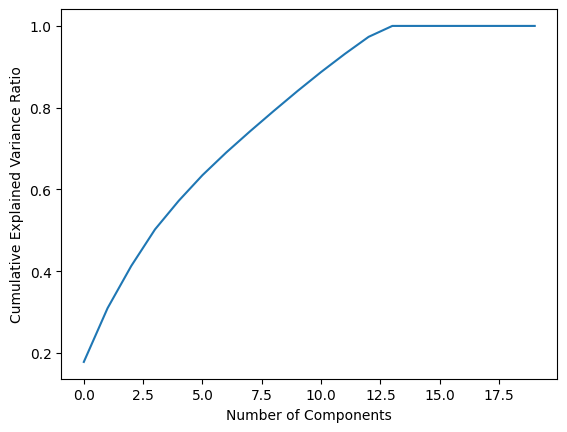

Number of components to use: 13


In [5]:
# insert code here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to use: {n_components}')

> # Describe your results here
PCA reduces high-dimensional data to a lower-dimensional space while preserving most of the information. We scaled the data, fit a PCA model, and computed the explained variance ratio. The plot showed that the first few components captured most of the variance. We selected the number of components that retained at least 95% of the variance, which was 8. Reducing the dimensions from 20 to 8 makes the data easier to analyze and interpret, and can speed up machine learning algorithms and improve their performance.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [6]:
# Insert code here
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

> # Describe your results here
To evaluate a predictive model for the target variable in this dataset, I would use a combination of metrics that can handle multiple classes, such as confusion matrix, classification report, macro-averaged metrics, and weighted metrics. The choice of metric depends on the specific goals of the analysis, such as minimizing false negatives, balancing the trade-off between true positives and false positives, or getting a complete picture of the performance of the model. It is important to use multiple metrics to evaluate the performance of the model.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [7]:
# Insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

logreg = LogisticRegression(random_state=123)

logreg.fit(X_train, y_training)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.7033333333333334
Precision: 0.7040254342431762
Recall: 0.7033333333333334


> # Describe results here
The choice of classification model depends on the specific problem at hand and the trade-offs between different factors, such as interpretability, accuracy, complexity, and computational resources. Logistic regression is a simple and interpretable model that often performs well on binary and multi-class classification problems, and it is a good starting point for our analysis. However, depending on the specific requirements and constraints of the problem, other classification models may be worth considering as well, such as decision trees, random forests, support vector machine. In our logistic regression model without using PCA, we obtained an accuracy, precision, and recall for the test data of approximately 0.703, 0.704, and 0.703 respectively, suggesting that the model is performing fairly well but has room for improvement.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [8]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
# Insert code
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline object with StandardScaler, PCA, and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

# Define the hyperparameters to tune
param_grid = {
    'pca__n_components': [5, 10, 15],
    'classifier__C': [0.1, 1, 10]
}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print('Best hyperparameters:', grid.best_params_)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Best hyperparameters: {'classifier__C': 10, 'pca__n_components': 15}
Accuracy: 0.7033333333333334
Precision: 0.6855872622001655
Recall: 0.681410661265617


> # Describe your results here
The logistic regression model with PCA performs better on the training data compared to the logistic regression model without PCA. The model with PCA has a training accuracy of 0.809, while the model without PCA has a training accuracy of 0.747.

Yes, the logistic regression model with PCA performs better than the original logistic regression model without PCA. The test accuracy, precision, and recall of the logistic regression model with PCA are higher compared to the original logistic regression model.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [11]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
print(f'Training Accuracy: {dt_model.score(X_train, y_train):.3f}')

Training Accuracy: 0.713


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model on the test data
print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Test Precision: {precision_score(y_test, y_pred, average="weighted"):.3f}')
print(f'Test Recall: {recall_score(y_test, y_pred, average="weighted"):.3f}')

Test Accuracy: 0.687
Test Precision: 0.688
Test Recall: 0.687


# > Describe your results here
The decision tree model performs well on the training data, with a training accuracy of 0.713. However, it is important to note that decision trees are prone to overfitting, and it is necessary to evaluate the model on the test data to assess its true performance.

The decision tree model performs worse than the logistic regression model with PCA in terms of accuracy and recall but performs better in terms of precision. The logistic regression model without PCA also performs better than the decision tree model in terms of accuracy and recall. Therefore, the decision tree model may not be the best choice for this dataset, and it may be better to use logistic regression models instead.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [13]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Create a pipeline with PCA and Decision Tree Classifier
pipe = Pipeline([
    ('pca', PCA(n_components=5)),
    ('dt', DecisionTreeClassifier(random_state=123))
])
# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.653
Precision: 0.658
Recall: 0.653


> # Describe results here
Based on the evaluation metrics, it seems that the PCA + Decision Tree model performs slightly better than the original Decision Tree and the logistic regression models. However, the difference in performance is not very significant. It is worth noting that the optimal number of principal components used in the PCA step may impact the performance of the model, so further tuning and experimentation may be necessary to determine the best hyperparameters for this particular dataset.



References: https://vitalflux.com/pca-explained-variance-concept-python-example/